In [151]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

In [152]:
df = pd.read_csv('Seattle.csv')

In [153]:
df.market.unique()

array(['Seattle'], dtype=object)

In [154]:

features = ['picture_url', 'host_since', 'last_scraped',
                     'host_response_time', 'host_response_rate', 'host_acceptance_rate','host_is_superhost',
                     'host_picture_url', 'host_listings_count', 'host_total_listings_count',
                     'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed',
                     'neighbourhood_group_cleansed','latitude', 'longitude',
                     'is_location_exact', 'property_type', 'room_type', 'accommodates',
                     'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'cleaning_fee', 'price',
                     'security_deposit','guests_included', 'extra_people', 'minimum_nights', 'calendar_updated',
                     'has_availability','city',
                     'number_of_reviews', 'first_review', 'last_review',
                     'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location', 'review_scores_value', 'instant_bookable',
                     'cancellation_policy', 'require_guest_profile_picture',
                     'require_guest_phone_verification', 'calculated_host_listings_count',
                     'reviews_per_month']

In [155]:
data_old = df[features]

In [156]:
data_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 52 columns):
picture_url                         3818 non-null object
host_since                          3816 non-null object
last_scraped                        3818 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_picture_url                    3816 non-null object
host_listings_count                 3816 non-null float64
host_total_listings_count           3816 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
neighbourhood_cleansed              3818 non-null object
neighbourhood_group_cleansed        3818 non-null object
latitude                            

In [157]:
data_old.shape

(3818, 52)

In [158]:
data_old.describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,...,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000
mean,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,...,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,...,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348
min,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,...,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000
50%,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,...,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000
75%,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,...,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


In [159]:
data = data_old.drop_duplicates()
data_old.isnull().sum()

picture_url                            0
host_since                             2
last_scraped                           0
host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_picture_url                       2
host_listings_count                    2
host_total_listings_count              2
host_verifications                     0
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             16
bedrooms                               6
beds                                   1
bed_type        

In [160]:
data = data.drop(['square_feet','security_deposit','last_scraped'],1)

In [161]:
cols = ['cleaning_fee','price','extra_people']
for i in cols:
    data[i] = data[i].str.replace('$','')
    data[i] = pd.to_numeric(data[i], errors = 'coerce')
    
data['host_response_rate'] = data['host_response_rate'].astype('str').str.replace('%','')
data['host_response_rate'] = data['host_response_rate'].astype('float')

In [162]:
#fill_mean = ['cleaning_fee','reviews_per_month','host_response_rate','host_total_listings_count','host_listings_count',
#'review_scores_rating']
## do something about data.host_verifications.unique(), amenities, calendar_updated

data['host_verifications'] = data['host_verifications'].notnull()
data['amenities'] = data['amenities'].str.replace("{",'').str.replace("}",'').str.split()

In [163]:
data['amenities'] = data['amenities'].apply(lambda x: len(x))

In [164]:
dates = ['host_since','first_review','last_review']


In [165]:
cont_var = ['host_response_rate','host_listings_count','host_total_listings_count','accommodates','bathrooms','bedrooms',
           'beds','cleaning_fee','price','guests_included','extra_people','minimum_nights','number_of_reviews',
           'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
           'review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count',
           'reviews_per_month','amenities']

In [166]:
cat_var = ['host_response_time','host_acceptance_rate','host_is_superhost','host_has_profile_pic','host_identity_verified',
          'neighbourhood_cleansed','neighbourhood_group_cleansed','is_location_exact','property_type','room_type',
          'bed_type','has_availability','instant_bookable','cancellation_policy','require_guest_profile_picture',
         'require_guest_phone_verification']

In [167]:
for i in cont_var:
    data[i] = data[i].astype('float')

In [168]:
labels = preprocessing.LabelEncoder()
for i in cat_var:
    data[i] = data[i].fillna(99)
    data[i] = labels.fit_transform(data[i])

    mapping = dict(zip(labels.classes_, range(len(labels.classes_))))
    print(mapping)

{99: 0, 'a few days or more': 1, 'within a few hours': 3, 'within a day': 2, 'within an hour': 4}
{'100%': 2, 99: 0, '0%': 1}
{99: 0, 't': 2, 'f': 1}
{99: 0, 't': 2, 'f': 1}
{99: 0, 't': 2, 'f': 1}
{'Eastlake': 17, 'Harrison/Denny-Blaine': 28, 'Minor': 47, 'Gatewood': 22, 'Fremont': 21, 'West Woodland': 82, 'North Queen Anne': 55, 'North College Park': 53, 'Cedar Park': 11, 'Madison Park': 40, 'University District': 76, 'East Queen Anne': 16, 'South Park': 72, 'Lower Queen Anne': 38, 'Phinney Ridge': 57, 'Mann': 42, 'North Delridge': 54, 'Yesler Terrace': 86, 'Westlake': 83, 'North Admiral': 50, 'Broadway': 9, 'Belltown': 4, 'Madrona': 41, 'Lawton Park': 36, 'Portage Bay': 61, 'Riverview': 64, 'Interbay': 33, 'Victory Heights': 77, 'Loyal Heights': 39, 'Crown Hill': 14, 'Fauntleroy': 19, 'Sunset Hill': 75, 'Bryant': 10, 'Highland Park': 30, 'First Hill': 20, 'Seaview': 67, 'High Point': 29, 'Laurelhurst': 35, 'Green Lake': 25, 'Windermere': 85, 'Fairmount Park': 18, 'South Beacon Hill'

In [169]:
for i in dates:
    data[i] = pd.to_datetime(data[i])

In [170]:
for i in cont_var:
    data[i] = data[i].fillna(data[i].mean())

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 49 columns):
picture_url                         3818 non-null object
host_since                          3816 non-null datetime64[ns]
host_response_time                  3818 non-null int64
host_response_rate                  3818 non-null float64
host_acceptance_rate                3818 non-null int64
host_is_superhost                   3818 non-null int64
host_picture_url                    3816 non-null object
host_listings_count                 3818 non-null float64
host_total_listings_count           3818 non-null float64
host_verifications                  3818 non-null bool
host_has_profile_pic                3818 non-null int64
host_identity_verified              3818 non-null int64
neighbourhood_cleansed              3818 non-null int64
neighbourhood_group_cleansed        3818 non-null int64
latitude                            3818 non-null float64
longitude                          

In [172]:
data.isnull().sum()

picture_url                           0
host_since                            2
host_response_time                    0
host_response_rate                    0
host_acceptance_rate                  0
host_is_superhost                     0
host_picture_url                      2
host_listings_count                   0
host_total_listings_count             0
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             0
bedrooms                              0
beds                                  0
bed_type                              0
amenities                             0


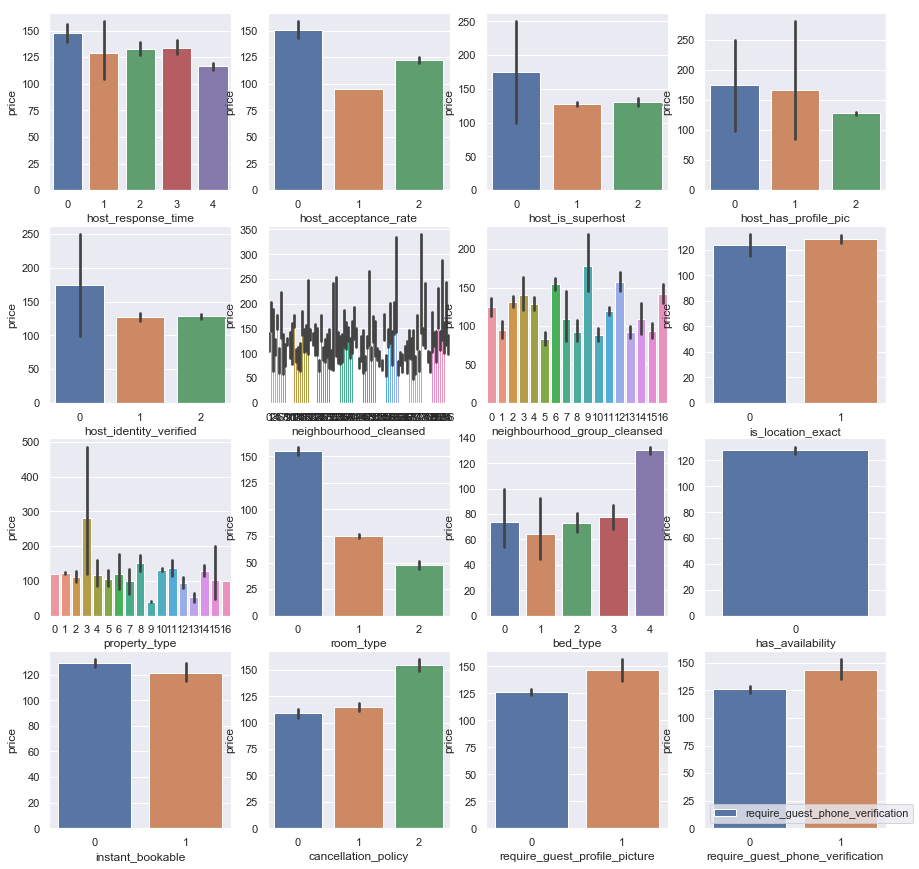

In [142]:
# find outliers
f,ax = plt.subplots(4,4,figsize = (15,15))
for n in range(len(cat_var)):
    i = n/4
    j = n%4
    sns.barplot(x = cat_var[n], y = 'price', ax = ax[i,j], data = data, label = cat_var[n])
    plt.legend()
    
    
    

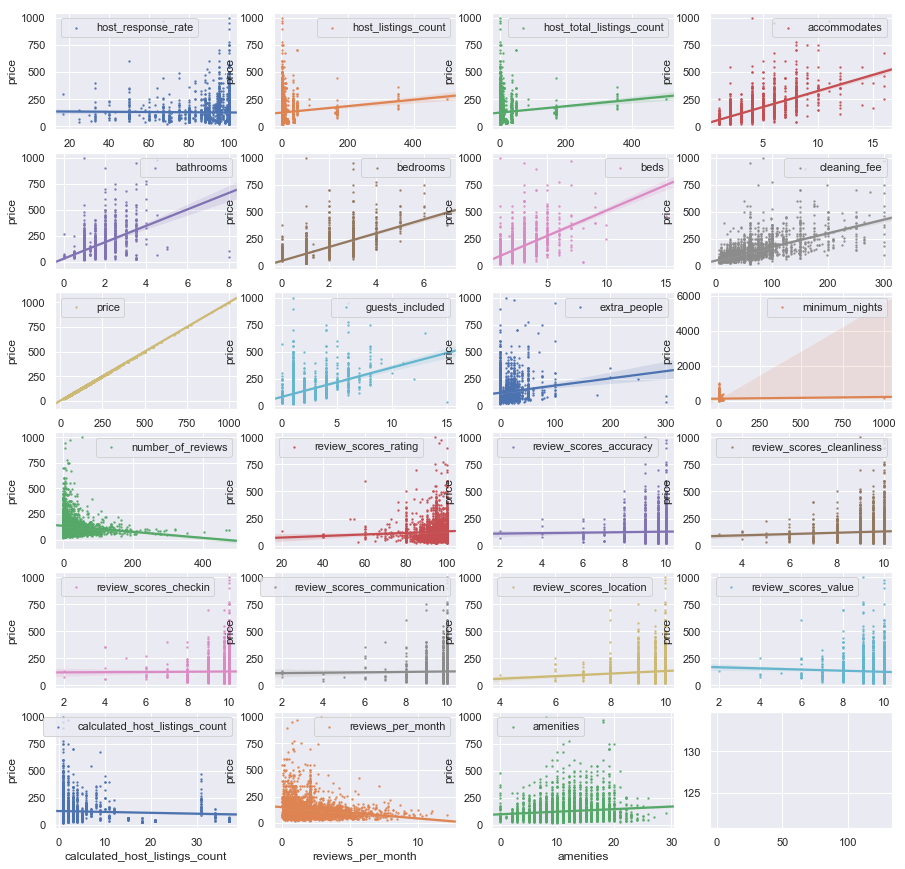

In [143]:
# find outliers
f,ax = plt.subplots(6,4,figsize = (15,15))

for n in range(len(cont_var)):
    i = n/4
    j = n%4
    g = sns.regplot(x = cont_var[n], y = 'price', ax = ax[i,j], data = data,scatter_kws={'s':2}, label = cont_var[n])
    g.legend()




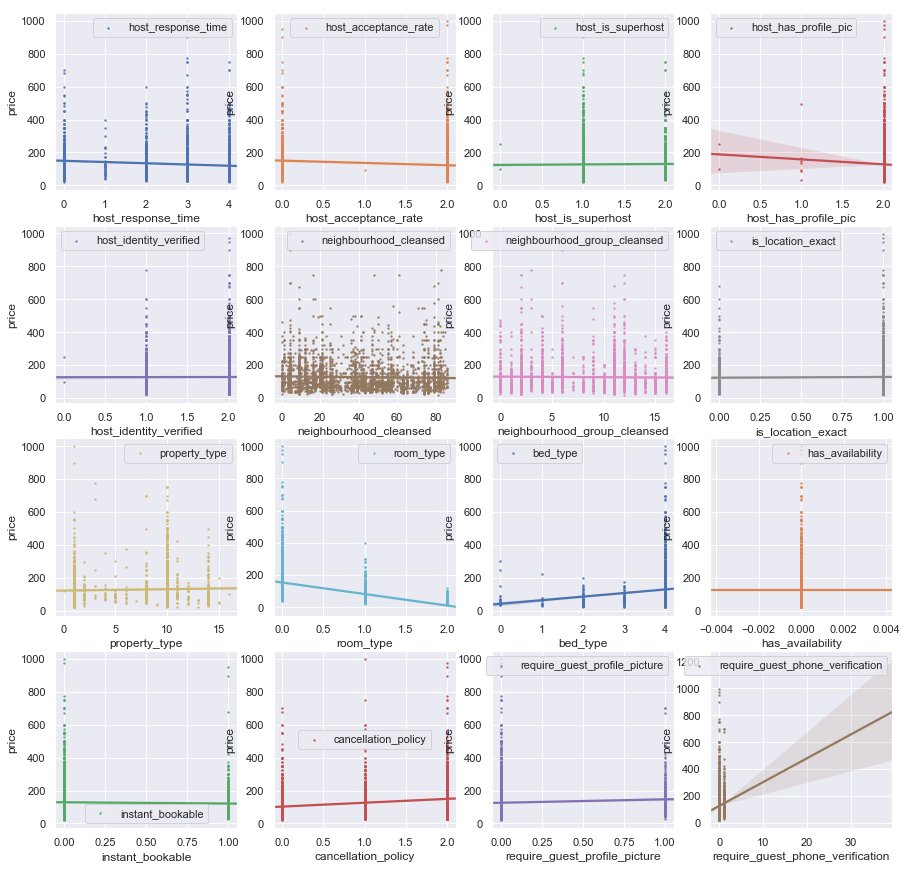

In [144]:
# find outliers
f,ax = plt.subplots(4,4,figsize = (15,15))

for n in range(len(cat_var)):
    i = n/4
    j = n%4
    g = sns.regplot(x = cat_var[n], y = 'price', ax = ax[i,j], data = data,scatter_kws={'s':2}, label = cat_var[n])
    g.legend()



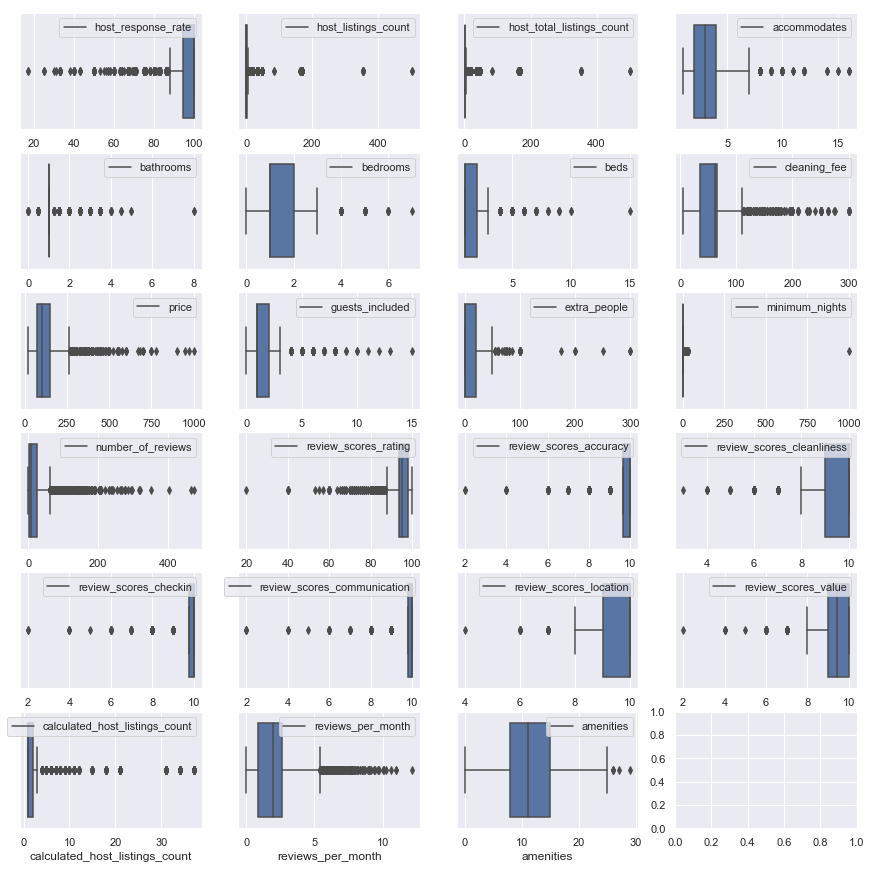

In [145]:
# find outliers
f,ax = plt.subplots(6,4,figsize = (15,15))

for n in range(len(cont_var)):
    i = n/4
    j = n%4
    _ = sns.boxplot(x = data[cont_var[n]],ax = ax[i,j])
    _.legend([cont_var[n]], loc = 'upper right')
   


In [173]:
data[cont_var[10:]].describe()

,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,amenities
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,10.667627,2.369303,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919,11.497381
std,17.585922,16.305902,37.730892,6.020223,0.635022,0.725880,0.541745,0.517493,0.572542,0.682751,5.893029,1.665964,4.600591
min,0.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000,0.000000
25%,0.000000,1.000000,2.000000,94.000000,9.636392,9.000000,9.786709,9.809599,9.000000,9.000000,1.000000,0.830000,8.000000
50%,0.000000,2.000000,9.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.452245,1.000000,2.000000,11.000000
75%,20.000000,2.000000,26.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.660000,15.000000
max,300.000000,1000.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000,29.000000


In [174]:
#max of extra people and min nights seems unreasonable

min_nights = data['minimum_nights'].quantile(0.995)

data['minimum_nights'] = data['minimum_nights'].map(lambda x: min(x,min_nights))


In [176]:
#removing redundant and pointless features
drop_ = ['host_total_listings_count','has_availability','host_is_superhost','host_identity_verified',
       'neighbourhood_group_cleansed','is_location_exact','review_scores_checkin','review_scores_accuracy',
       'review_scores_communication','instant_bookable','host_verifications']
data = data.drop(drop_,1)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 38 columns):
picture_url                         3818 non-null object
host_since                          3816 non-null datetime64[ns]
host_response_time                  3818 non-null int64
host_response_rate                  3818 non-null float64
host_acceptance_rate                3818 non-null int64
host_picture_url                    3816 non-null object
host_listings_count                 3818 non-null float64
host_has_profile_pic                3818 non-null int64
neighbourhood_cleansed              3818 non-null int64
latitude                            3818 non-null float64
longitude                           3818 non-null float64
property_type                       3818 non-null int64
room_type                           3818 non-null int64
accommodates                        3818 non-null float64
bathrooms                           3818 non-null float64
bedrooms                      

In [178]:
data.to_csv('dataset.csv')